In [1]:
# 1. Fire off notebook
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 2. Check if env var DFDATA exists
dfdata = os.getenv('DFDATA')
dfdata

'/gws/open/NYCOpenData/nycopendata/data'

In [3]:
# 3. Read csv file

# source: http://urbanprofiler.cloudapp.net/dataset/easq-ubfe/
data_file = 'easq-ubfe/1414245731/easq-ubfe'

df = pd.read_csv(os.path.join(dfdata, data_file), low_memory=False) # low_memory just suppresses an error

# 4. Display top rows
df.head()

,ELECTION,OFFICECD,CANDID,CANCLASS,CANDLAST,CANDFIRST,CANDMI,COMMITTEE,FILING,SCHEDULE,...,APARTMENT,PAY_METHOD,AMNT,PURPOSECD,PURPOSE,EXPLAIN,EXEMPTCD,RR_IND,SEG_IND,Location 1
0,NaN,NaN,CANDID,CANCLASS,CANDLAST,CANDFIRST,CANDMI,COMMITTEE,NaN,SCHEDULE,...,APARTMENT,PAY_METHOD,NaN,PURPOSECD,PURPOSE,EXPLAIN,EXEMPTCD,RR_IND,SEG_IND,NaN
1,2005.0,4.0,206,P,Manzano,Carlos,NaN,K,5.0,F,...,NaN,Final,918.0,FUNDR,Fundraising,Catered Event,NaN,N,N,"New York, NY 10019\n(40.76761164715987, -73.99..."
2,2005.0,4.0,ED,P,"Carrion, Jr.",Adolfo,NaN,J,5.0,F,...,3RDFL,Final,1500.0,OTHER,Other: explntion,EVENT TICKETS,NaN,N,N,"New York, NY 10017\n(40.75245652744684, -73.97..."
3,2005.0,4.0,ED,P,"Carrion, Jr.",Adolfo,NaN,J,8.0,F,...,3RDFL,Final,3200.0,CNTRB,Polit Contribs.,EVENT TICKETS,NaN,N,N,"New York, NY 10017\n(40.75245652744684, -73.97..."
4,2005.0,4.0,BW,P,Moskowitz,Eva,S,A,10.0,F,...,NaN,Final,55.0,OTHER,Other: explntion,Flowers,NaN,N,N,NaN


In [4]:
# two numerical columns that we will plot against each other
xcol, ycol = 'INV_DATE', 'AMNT'

# 5. Remove all but two numerical columns
df_plot = df.drop([
        col for col in df.columns 
        if col not in [xcol, ycol]
], axis=1).dropna(how='any')

# Convert datetime string to actual datetime
df_plot[xcol] = pd.to_datetime(df_plot[xcol])

# Group expendatures by day
df_plot = df_plot.groupby(
    pd.TimeGrouper(key=xcol, freq='1D')
).sum().dropna().reset_index()

# 6. Display reduced dataframe
df_plot.head()

,INV_DATE,AMNT
0,2001-10-29,915.0
1,2001-12-05,2000.0
2,2001-12-17,2000.0
3,2001-12-18,12.0
4,2002-01-15,2000.0


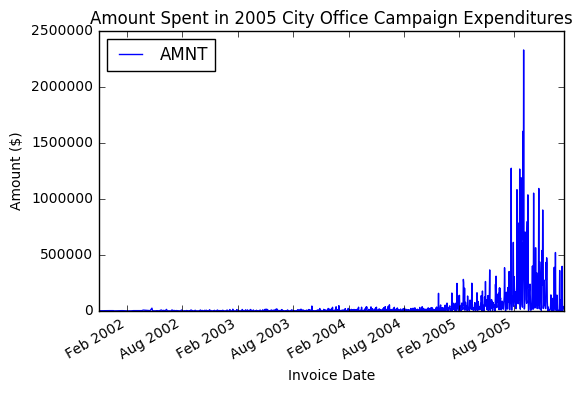

In [5]:
# 7. Plot the number against date column
df_plot.plot(xcol, ycol)

plt.title('Amount Spent in 2005 City Office Campaign Expenditures')
plt.xlabel('Invoice Date')
plt.ylabel('Amount ($)')
plt.show()

### Figure 1
Amount Spent in Campaign Expenditures for candidates for City office during the 2005 election cycle.